# Load necessary packages

In [3]:
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
import pandas as pd

# make sure you are in oy-env

In [123]:
# Creates pointer to opportunity_youth data, and then selects a table (oy_puma) that
# displays OY per PUMA. Then the 'puma' column is converted into a string
engine = create_engine("postgresql:///opportunity_youth")
oy_per_puma_df = pd.read_sql('oy_puma', con=engine)
oy_per_puma_df.loc[:,'puma'] = oy_per_puma_df['puma'].astype(int)

In [125]:
oy_per_puma_df.loc[:,'PUMACE10'] = oy_per_puma_df['puma']

In [126]:
oy_per_puma_df

,puma,total_per_region,PUMACE10
0,11604,1070.0,11604
1,11605,1092.0,11605
2,11610,1870.0,11610
3,11611,2110.0,11611
4,11612,2125.0,11612
5,11613,2133.0,11613
6,11614,1631.0,11614


In [127]:
# inner join with KC data to make a SKC only subset with the OY Population Data Added
just_skc = pd.merge(skc_puma, oy_per_puma_df, on='PUMACE10', how='inner')

In [6]:
## this is old
##kc_puma = wa_puma[wa_puma['NAMELSAD10'].str.contains('King' or 'Seattle')]

In [215]:
## Might not need all of these, from http://darribas.org/gds15/content/labs/lab_03.html#Styling-plots

# import matplotlib.pyplot as plt
# import geopandas as gpd
# # import pysal as ps
# from pysal.contrib.viz import mapping as maps

# Load necessary data

In [7]:
# Import Washington PUMA Data
wa_puma = gpd.read_file("data/raw/tl_2017_53_puma10.shp") 

In [3]:
# Trying to find where West Seattle is
# wa_puma['NAMELSAD10'].str.contains('Seattle')


In [9]:
## Converts PUMACE10 Column from string to integer
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)

In [10]:
# Selects all PUMA codes for King County (including Seattle) PUMAs and puts into Subset
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]

In [11]:
# List of PUMA #'s for S. Seattle and S. King County
skc_puma_list = [11604, 11605, 11610, 11611, 11612, 11613, 11614]

In [12]:
## Creates a new column, KCS and assigns a 1 if the PUMA is in S. King Country, or 0 otherwise
skc_puma = kc_puma.assign(KCS = [1 if row in skc_puma_list else 0 for row in kc_puma['PUMACE10']]) 

In [45]:
skc_puma

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,KCS
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",0
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",1
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5...",1
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6...",0
38,53,11601,5311601,Seattle City (Northwest) PUMA,G6120,S,43437175,5995523,+47.6909932,-122.3619886,"POLYGON ((-122.34043 47.64125, -122.34306 47.6...",0
39,53,11606,5311606,"King County (Northwest)--Shoreline, Kenmore & ...",G6120,S,75073924,5794567,+47.7564420,-122.2787890,"POLYGON ((-122.25359 47.73566, -122.26084 47.7...",0
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2...",0
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2...",1
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3...",1


## Visualization of South King County

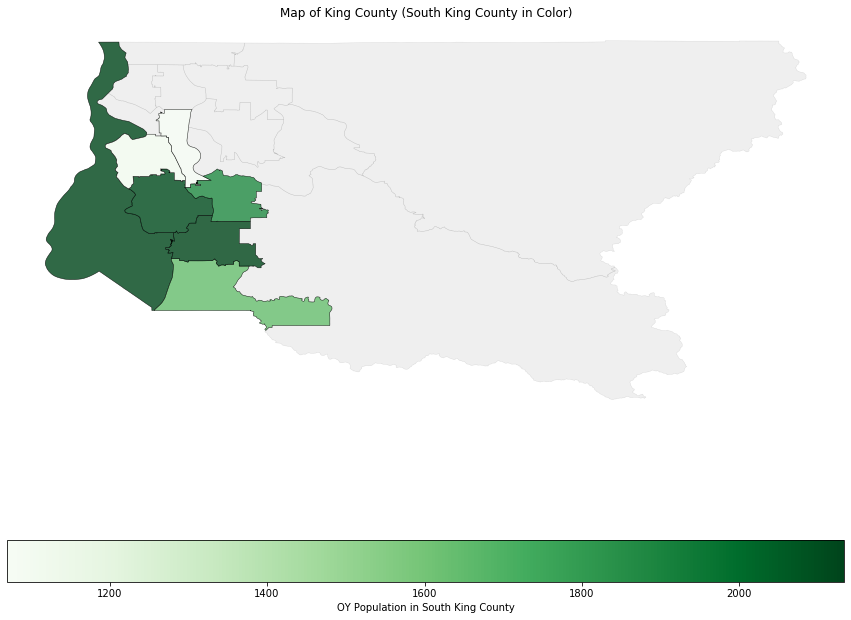

In [159]:
#current 'best map' of King County
f, ax = plt.subplots(1, figsize=(15, 15))
ax = skc_puma.plot(ax=ax, 
              column='KCS', cmap='Accent_r', alpha = .1, linewidth=.5, edgecolor='black',  legend = False)
ax = just_skc.plot(ax=ax, 
              column='total_per_region', 
              alpha = .8, legend = True, 
              cmap= 'Greens',
              linewidth= 0.5,
              edgecolor = 'black',
              legend_kwds={'label': "OY Population in South King County", 'orientation': "horizontal"})
ax.set_title('Map of King County (South King County in Color)')
ax.set_axis_off()
plt.savefig('South King County Opportunity Youth.png');

<Figure size 432x288 with 0 Axes>

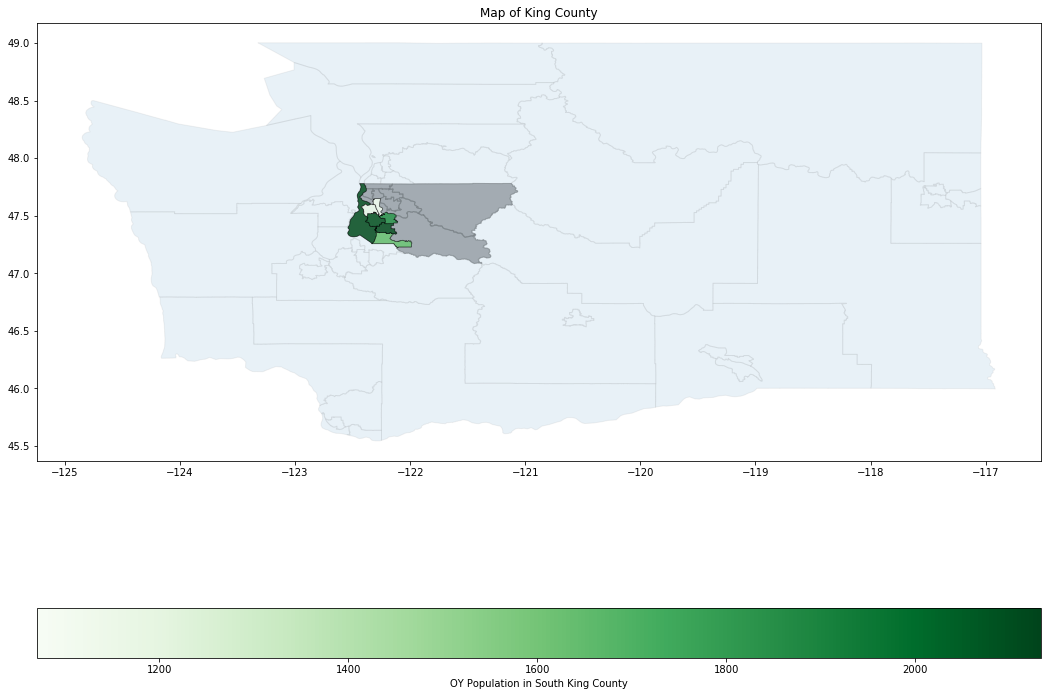

In [156]:
# kind of busy
f, ax = plt.subplots(1, figsize=(18, 18))
ax.set_title('Map of King County')
ax.set_aspect('equal')
skc_puma.plot(ax=ax, column='KCS', cmap='Accent_r', alpha = .5, linewidth=1, edgecolor='grey', legend = False)
wa_puma.plot(ax=ax, alpha = 0.1, linewidth=1, edgecolor='grey', legend = False)
just_skc.plot(ax=ax, 
              column='total_per_region', 
              alpha = .8, legend = True, 
              cmap= 'Greens',
              linewidth= 0.5,
              edgecolor = 'black',
              legend_kwds={'label': "OY Population in South King County", 'orientation': "horizontal"})
# # ax.set_axis_off()
# minx, miny, maxx, maxy = gdf.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)
plt.show();

# Plot the spacial data frame as a map